In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
X=minmax_scale.fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[0.09578243, 0.06405832, 0.1651094 , 0.43107171, 0.29263595,
        0.48667589, 0.56029107, 0.55993003, 0.13820556, 0.33400286],
       [0.06371056, 0.06326575, 0.18536369, 0.61791113, 0.46614313,
        0.42652335, 0.53415447, 0.49558919, 0.53951889, 0.4589365 ]])

In [4]:
test_Features[:2]

array([[0.0943362 , 0.06032015, 0.18725606, 0.35435845, 0.27381834,
        0.46981552, 0.55245141, 0.55339982, 0.23553333, 0.37881162],
       [0.54161873, 0.06188851, 0.21824364, 0.36310944, 0.25529708,
        0.71685353, 0.2787471 , 0.56218332, 0.55146667, 0.32294027]])

In [5]:
train_Label[:4]

array([1, 1, 1, 0])

In [6]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [7]:
train_Features.shape

(12743, 10)

In [8]:
test_Label[:4]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [10]:
train_Features = train_Features.reshape(train_Features.shape[0], 10, 1, 1)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(10,1,1), 
                 activation='relu'))

In [13]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(128, activation='tanh'))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Dense(2,activation='sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 1, 1000)       2000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 1, 1000)       1001000   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 1, 1000)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 1, 1000)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [21]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 


In [22]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=200,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/10
10194/10194 [==============================] - 97s 10ms/step - loss: 0.1651 - acc: 0.7688 - val_loss: 0.1380 - val_acc: 0.8113
Epoch 2/10
10194/10194 [==============================] - 73s 7ms/step - loss: 0.1405 - acc: 0.8095 - val_loss: 0.1334 - val_acc: 0.8231
Epoch 3/10
10194/10194 [==============================] - 68s 7ms/step - loss: 0.1280 - acc: 0.8283 - val_loss: 0.1217 - val_acc: 0.8380
Epoch 4/10
10194/10194 [==============================] - 69s 7ms/step - loss: 0.1254 - acc: 0.8305 - val_loss: 0.1187 - val_acc: 0.8494
Epoch 5/10
10194/10194 [==============================] - 69s 7ms/step - loss: 0.1218 - acc: 0.8376 - val_loss: 0.1267 - val_acc: 0.8364
Epoch 6/10
10194/10194 [==============================] - 69s 7ms/step - loss: 0.1200 - acc: 0.8411 - val_loss: 0.1184 - val_acc: 0.8482
Epoch 7/10
10194/10194 [==============================] - 69s 7ms/step - loss: 0.1181 - acc: 0.8418 - val_loss: 0.1143 - val_acc

In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

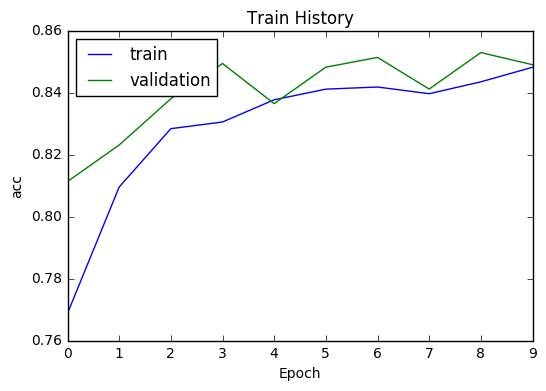

In [24]:
show_train_history(train_history,'acc','val_acc')

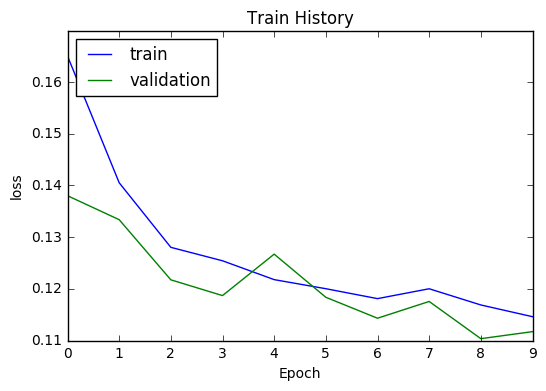

In [25]:
show_train_history(train_history,'loss','val_loss')

In [26]:
test_Features = test_Features.reshape(test_Features.shape[0], 10, 1, 1)

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 5s 795us/step


In [28]:
scores[1]

0.8570973394933885